In [279]:
import numpy 
import urllib
import scipy.optimize
import random
from math import exp
from math import log

In [54]:
random.seed(0)

def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)

In [55]:
def inner(x,y):
  return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
  return 1.0 / (1 + exp(-x))

In [56]:
##################################################
# Logistic regression by gradient ascent         #
##################################################

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
  loglikelihood = 0
  for i in range(len(X)):
    logit = inner(X[i], theta)
    loglikelihood -= log(1 + exp(-logit))
    if not y[i]:
      loglikelihood -= logit
  for k in range(len(theta)):
    loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print "ll =", loglikelihood
  return -loglikelihood

# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
  dl = [0]*len(theta)
  for i in range(len(X)):
    logit = inner(X[i], theta)
    for k in range(len(theta)):
      dl[k] += X[i][k] * (1 - sigmoid(logit))
      if not y[i]:
        dl[k] -= X[i][k]
  for k in range(len(theta)):
    dl[k] -= lam*2*theta[k]
  return numpy.array([-x for x in dl])

In [58]:
def parse_data(X,y):
    X_train = X[:int(len(X)/3)]
    y_train = y[:int(len(y)/3)]
    X_validate = X[int(len(X)/3):int(2*len(X)/3)]
    y_validate = y[int(len(y)/3):int(2*len(y)/3)]
    X_test = X[int(2*len(X)/3):]
    y_test = y[int(2*len(X)/3):]
    return X_train,y_train,X_validate,y_validate, X_test, y_test

In [59]:
##################################################
# Train                                          #
##################################################

def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
  return theta

##################################################
# Predict                                        #
##################################################

def performance(theta):
  scores_train = [inner(theta,x) for x in X_train]
  scores_validate = [inner(theta,x) for x in X_validate]
  scores_test = [inner(theta,x) for x in X_test]

  predictions_train = [s > 0 for s in scores_train]
  predictions_validate = [s > 0 for s in scores_validate]
  predictions_test = [s > 0 for s in scores_test]

  correct_train = [(a==b) for (a,b) in zip(predictions_train,y_train)]
  correct_validate = [(a==b) for (a,b) in zip(predictions_validate,y_validate)]
  correct_test = [(a==b) for (a,b) in zip(predictions_test,y_test)]
  
  acc_train = sum(correct_train) * 1.0 / len(correct_train)
  acc_validate = sum(correct_validate) * 1.0 / len(correct_validate)
  acc_test = sum(correct_test) * 1.0 / len(correct_test)
  return acc_train, acc_validate, acc_test

# Prob1
lambda = 0;	train=0.755514705882; validate=0.72933251684; test=0.758726270667

lambda = 0.01;	train=0.755514705882; validate=0.729944886712; test=0.758726270667

lambda = 1.0;	train=0.742034313725; validate=0.718309859155; test=0.744029393754

lambda = 100.0;	train=0.696691176471; validate=0.654011022658; test=0.687691365585

In [184]:
print "Reading data..."
dataFile = open("winequality-white.csv")
header = dataFile.readline()
fields = ["constant"] + header.strip().replace('"','').split(';')
featureNames = fields[:-1]
labelName = fields[-1]
lines = [[1.0] + [float(x) for x in l.split(';')] for l in dataFile]
print "done"
X = [l[:-1] for l in lines]
y = [l[-1] > 5 for l in lines]
print "shuffle data"
numpy.random.shuffle(lines)
print "done"
X_shuffle = [l[:-1] for l in lines]
y_shuffle = [l[-1] > 5 for l in lines]

Reading data...
done
shuffle data
done


In [61]:
X_train,y_train,X_validate,y_validate, X_test, y_test = parse_data(X_shuffle, y_shuffle)

In [62]:
##################################################
# Validation pipeline                            #
##################################################

for lam in [0, 0.01, 1.0, 100.0]:
  theta = train(lam)
  acc_train, acc_validate, acc_test = performance(theta)
  print("lambda = " + str(lam) + ";\ttrain=" + str(acc_train) + "; validate=" + str(acc_validate) + "; test=" + str(acc_test))

lambda = 0;	train=0.755514705882; validate=0.72933251684; test=0.758726270667
lambda = 0.01;	train=0.755514705882; validate=0.729944886712; test=0.758726270667
lambda = 1.0;	train=0.742034313725; validate=0.718309859155; test=0.744029393754
lambda = 100.0;	train=0.696691176471; validate=0.654011022658; test=0.687691365585


# Prob2
TP =  958 ;FP =  324 ;TN =  237 ;FN =  113 ;BER =  0.287793626031

In [185]:
X_train,y_train,X_validate,y_validate, X_test, y_test = parse_data(X, y)
theta = train(0.01)

In [187]:

scores_train = [inner(theta,x) for x in X_train]
scores_validate = [inner(theta,x) for x in X_validate]
scores_test = [inner(theta,x) for x in X_test]

predictions_train = [s > 0 for s in scores_train]
predictions_validate = [s > 0 for s in scores_validate]
predictions_test = [s > 0 for s in scores_test]

correct_train = [(a==b) for (a,b) in zip(predictions_train,y_train)]
correct_validate = [(a==b) for (a,b) in zip(predictions_validate,y_validate)]
correct_test = [(a==b) for (a,b) in zip(predictions_test,y_test)]

true_positive = [(a==b==True) for (a,b) in zip(predictions_test,y_test)]
false_positive = [(a==True!=b) for (a,b) in zip(predictions_test,y_test)]
true_negative = [(a==b==False) for (a,b) in zip(predictions_test,y_test)]
false_negative = [(a==False!=b) for (a,b) in zip(predictions_test,y_test)]

FPR = sum(false_positive)*1.0/(sum(true_positive)+sum(false_positive))
FNR = sum(false_negative)*1.0/(sum(true_negative)+sum(false_negative))
BER = (FPR+FNR)/2
print "TP = ", sum(true_positive), ";FP = ", sum(false_positive), ";TN = ",\
sum(true_negative),";FN = ", sum(false_negative), ";BER = ",BER
# #     return predictions_test

TP =  1129 ;FP =  321 ;TN =  145 ;FN =  38 ;BER =  0.214514791784


# Prob3
top  10 ;precision =  1.0 ;recall =  0.00689655172414

top  500 ;precision =  1.0 ;recall =  0.344827586207 

top  1000 ;precision =  1.0 ;recall =  0.689655172414

In [222]:
prediction_confi = [(a>0, b, a)for (a,b) in sorted(zip(scores_test, y_test),reverse = True)]

In [223]:
true_positive = [(a==b==True) for (a,b,_) in prediction_confi]
false_positive = [(a==True!=b) for (a,b,_) in prediction_confi]
true_negative = [(a==b==False) for (a,b,_) in prediction_confi]
false_negative = [(a==False!=b) for (a,b,_) in prediction_confi]

In [224]:
# tmp_all = [s > 0 for s in score_test_sorted]
# print sum(tmp_all),len(tmp_all)

In [227]:
n = [10,500,1000]
for t in n:
    tp = sum(true_positive[:t])
    precision = tp*1.0/t
    recall = tp*1.0/(sum(true_positive)+sum(false_negative))
    print "top ",t,";precision = ",precision,";recall = ", recall

top  10 ;precision =  1.0 ;recall =  0.00856898029135
top  500 ;precision =  0.956 ;recall =  0.409597257926
top  1000 ;precision =  0.864 ;recall =  0.740359897172


# Prob4

In [135]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [197]:
n = range(1,len(score_test_sorted))

In [228]:
precision = []
recall =[]
for i in range(1,len(score_test_sorted)):
    tp = sum(true_positive[:i])
    p = tp*1.0/i
    r = tp*1.0/(sum(true_positive)+sum(false_negative))
    precision.append(p)
    recall.append(r)

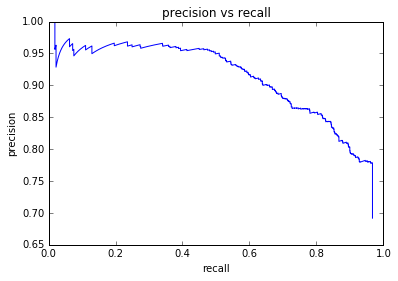

In [230]:
plt.plot(recall, precision,linewidth=1.0)
# plt.semilogx(recall, precision,linewidth=5.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision vs recall')
plt.show()

# Prob5
1780.2763558

In [320]:
sum(numpy.var(numpy.array(X_test),0))
#     *len(X_test[0]))

1780.2763558007775

In [325]:
X_bar = numpy.mean(X_test, axis=0)

tmp = numpy.array(X_bar)
t = numpy.tile(tmp, [len(X_test),1])
# numpy.array(X_test) - t
reconstruction_error = mean_squared_error(t, X_test) * len(X_test[0])
print reconstruction_error
print numpy.sum((t-X_test)**2)/len(X_test)

1780.2763558
1780.2763558


# Prob6

In [269]:
import numpy
import urllib
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict

### PCA on beer reviews ###

In [331]:
# def parseData(fname):
#   for l in urllib.urlopen(fname):
#     yield eval(l)

# print "Reading data..."
# data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
# print "done"

# X = [[x['review/overall'], x['review/taste'], x['review/aroma'], x['review/appearance'], x['review/palate']] for x in data]

pca = PCA()
pca.fit(X_train)
print pca.components_

[[  0.00000000e+00  -3.23636346e-04   1.42201752e-04   3.17030713e-04
    5.36390435e-02   9.30284526e-05   2.54030965e-01   9.65655009e-01
    3.19990241e-05  -2.95831396e-04   3.84043646e-04  -1.00526693e-02]
 [  0.00000000e+00   7.57985623e-03   1.66366340e-03  -1.04742899e-03
   -5.21677266e-02  -4.49425600e-05  -9.65020304e-01   2.56793964e-01
   -7.90089050e-06  -5.24900596e-04   1.09699394e-03   2.89827657e-03]
 [  0.00000000e+00  -1.82124420e-02  -2.54680710e-03  -3.31838657e-03
   -9.93221259e-01   1.51888372e-04   6.42297821e-02   3.91682592e-02
   -4.30929482e-04   6.93199060e-03   2.85216045e-03   8.62920933e-02]
 [  0.00000000e+00  -1.56811999e-01  -3.28220652e-03  -1.66866136e-02
   -8.28549640e-02   6.91822288e-03  -1.13029682e-03  -5.39110108e-03
    9.49080503e-04  -2.68027305e-03  -1.30498102e-03  -9.83955205e-01]
 [  0.00000000e+00   9.81360642e-01  -1.45890108e-02   5.92643662e-02
   -3.17546064e-02   5.07483182e-04   8.43759364e-03  -1.77578042e-03
    6.03725221e-

# Prob7
0.824433562562

In [276]:
pca = PCA(n_components = 4)
pca.fit(X_train)
print pca.components_

[[  0.00000000e+00  -3.23636346e-04   1.42201752e-04   3.17030713e-04
    5.36390435e-02   9.30284526e-05   2.54030965e-01   9.65655009e-01
    3.19990241e-05  -2.95831396e-04   3.84043646e-04  -1.00526693e-02]
 [  0.00000000e+00   7.57985623e-03   1.66366340e-03  -1.04742899e-03
   -5.21677266e-02  -4.49425600e-05  -9.65020304e-01   2.56793964e-01
   -7.90089050e-06  -5.24900596e-04   1.09699394e-03   2.89827657e-03]
 [  0.00000000e+00  -1.82124420e-02  -2.54680710e-03  -3.31838657e-03
   -9.93221259e-01   1.51888372e-04   6.42297821e-02   3.91682592e-02
   -4.30929482e-04   6.93199060e-03   2.85216045e-03   8.62920933e-02]
 [  0.00000000e+00  -1.56811999e-01  -3.28220652e-03  -1.66866136e-02
   -8.28549640e-02   6.91822288e-03  -1.13029682e-03  -5.39110108e-03
    9.49080503e-04  -2.68027305e-03  -1.30498102e-03  -9.83955205e-01]]


In [303]:
# print pca.transform(X_train)[0]
# tmp =pca.transform(X_train)[0]
# print numpy.dot(pca.components_,X_train[0]-pca.mean_)
# print X_train[0]
# print pca.inverse_transform(tmp)

In [304]:
X_rc = pca.inverse_transform(pca.transform(X_train))

In [321]:
reconstruction_error = mean_squared_error(X_rc, X_train) * len(X_train[0])

In [322]:
print reconstruction_error

0.824433562562


# Prob 8
As more dimensions are used, the mse of training gets smaller while mse of testing gets bigger;
which implies that the LR for training become overfitting and the prediction for testing gets worse;

1 dimension(s); mse of training 0.762990179268 mse of testing 0.797101643722

2 dimension(s); mse of training 0.762473588874 mse of testing 0.798537987919

3 dimension(s); mse of training 0.762258774564 mse of testing 0.799696473979

4 dimension(s); mse of training 0.762253940342 mse of testing 0.799722068916

5 dimension(s); mse of training 0.76220707837 mse of testing 0.799680157945

6 dimension(s); mse of training 0.761887403996 mse of testing 0.800468499436

7 dimension(s); mse of training 0.761684672287 mse of testing 0.800821189728

8 dimension(s); mse of training 0.759746637862 mse of testing 0.803946441825

9 dimension(s); mse of training 0.759713412903 mse of testing 0.804227079063

10 dimension(s); mse of training 0.759472448622 mse of testing 0.804727548528

11 dimension(s); mse of training 0.758726469882 mse of testing 0.803930574366


In [378]:
X_lr = [l[:-1] for l in lines]
y_lr = [l[-1] for l in lines]
_,y_train_lr,_,_,_, y_test_lr = parse_data(X_lr, y_lr)

In [ ]:
mse_p_a = numpy.sum((y_t-y_p_a)**2)/len(y_t)

In [379]:
pca = PCA()
pca.fit(X_train)
X_train_pca =  pca.transform(X_train)
X_test_pca =  pca.transform(X_test)

In [ ]:
def feature(d):
    t = [1.0]
    t.extend(d)
    return t

In [385]:
for n in range(1,12):
    # construct data
    tmp = X_train_pca[:,:n]
    _ = [feature(d) for d in tmp]
    _test = [feature(d) for d in X_test_pca[:,:n]]
    # fit linear regression
    theta,residuals,rank,s = numpy.linalg.lstsq(_, y_train_lr)
    y_p = numpy.sum(_ * theta.T, axis = 1)
    mse = numpy.sum((y_p-y_train_lr)**2)/len(y_p)

    y_p_test = numpy.sum(_test* theta.T, axis = 1)
    mse_test = numpy.sum((y_p_test-y_test_lr)**2)/len(y_p_test)
    print n,'dimension(s);','mse of training',mse,'mse of testing',mse_test
    print 

1 dimension(s); mse of training 0.762990179268 mse of testing 0.797101643722

2 dimension(s); mse of training 0.762473588874 mse of testing 0.798537987919

3 dimension(s); mse of training 0.762258774564 mse of testing 0.799696473979

4 dimension(s); mse of training 0.762253940342 mse of testing 0.799722068916

5 dimension(s); mse of training 0.76220707837 mse of testing 0.799680157945

6 dimension(s); mse of training 0.761887403996 mse of testing 0.800468499436

7 dimension(s); mse of training 0.761684672287 mse of testing 0.800821189728

8 dimension(s); mse of training 0.759746637862 mse of testing 0.803946441825

9 dimension(s); mse of training 0.759713412903 mse of testing 0.804227079063

10 dimension(s); mse of training 0.759472448622 mse of testing 0.804727548528

11 dimension(s); mse of training 0.758726469882 mse of testing 0.803930574366

